<a href="https://colab.research.google.com/github/Meenalsh72/Sales-Forecasting/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**:
This project focuses on applying time series forecasting techniques, specifically ARIMA and SARIMA models, to predict future sales for different product categories like furniture and office supplies. We start by preparing and cleaning the data—this includes handling missing values, filtering relevant information, and restructuring the data into a time series format. Once the data is ready, we apply the ARIMA model, tuning it using grid search to find the best combination of parameters (p, d, q) for accurate forecasting. SARIMA is then used to incorporate seasonal patterns into the model, enhancing the accuracy of our predictions. The models are trained using historical data, and we generate forecasts for the next 36 months. Finally, the results are visualized through diagnostic plots and trend graphs, helping us assess model performance and providing insights into future sales trends for informed decision-making.

Importing the necessary libraries for time series analysis includes using `warnings` to ignore unnecessary warnings during execution. The plot style is set to 'fivethirtyeight' using matplotlib, which provides a clean, modern look for the plots. For data manipulation, `numpy` and `pandas` are used. To build and analyze the ARIMA model, `statsmodels.api` is imported. Additionally, `matplotlib` settings are customized to adjust the font sizes and color for the labels and ticks, ensuring the plots are more readable and visually appealing. This setup prepares the environment for conducting time series analysis and visualizing the results.


In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


The data is loaded from the "Sample - Superstore" Excel file, and then it's filtered to get only the rows where the category is "Furniture." Now, the furniture data is ready for analysis.

In [5]:
df = pd.read_excel("/content/Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

First, selecting specific columns from the furniture data and dropping the unnecessary ones. Then, sorting the data by the 'Order Date'. Finally, checking for any missing values using `isnull().sum()` to identify any null values in the dataset.

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

,0
Order Date,0
Sales,0


Grouping the furniture data by 'Order Date' and summing up the 'Sales' for each date. Then, resetting the index to get a clean dataset.


In [8]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

Setting 'Order Date' as the index of the furniture data. Then, checking the index to confirm it's been set correctly.

In [9]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Using the average daily sales for the month and the start of each month as the timestamp simplifies the analysis by removing daily fluctuations. It helps to focus on monthly trends, making it easier to identify patterns and avoid issues with inconsistent datetime data.

In [10]:
y = furniture['Sales'].resample('MS').mean()

Having a quick peek 2017 furniture sales data.

In [11]:
y['2017':]

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


##Visualizing Furniture Sales Time Series Data

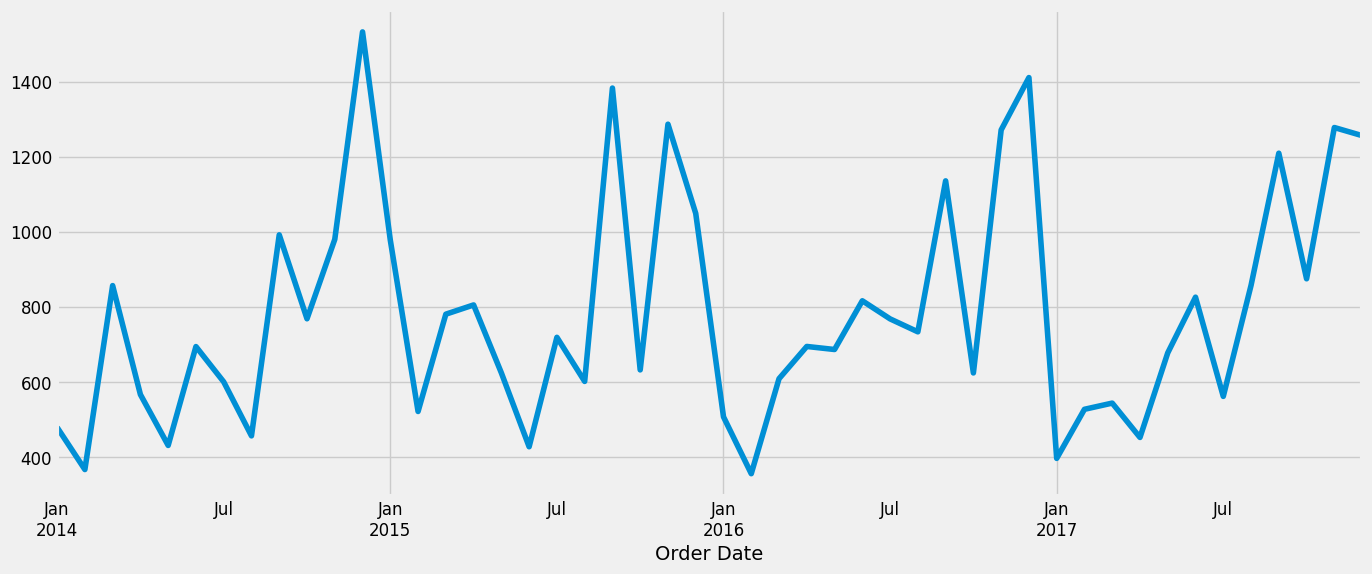

In [12]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.
_____________________________________________


We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

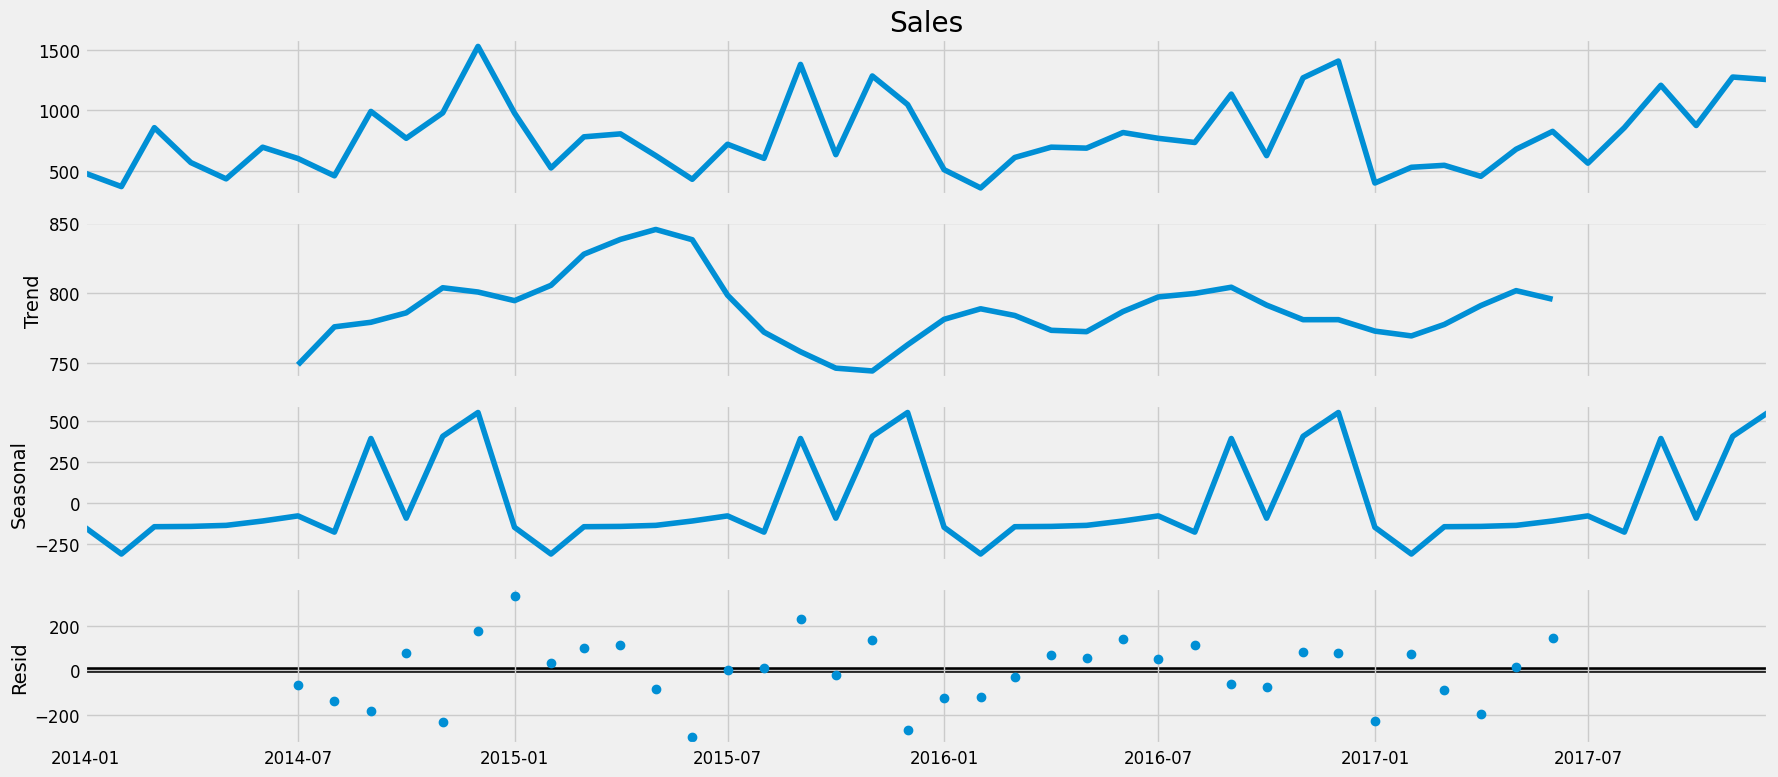

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.
_______________________________________________

##Time series forecasting with ARIMA
Applying one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
The model is written as ARIMA(p, d, q):

p is how many past values to use.
d is how many times we adjust the data to make it stable.
q is how many past errors to consider.
chose ARIMA here because it works well for data that has trends but no strong seasonal patterns. It’s flexible, handles noise well, and is effective when we want to focus on modeling trends and relationships in the data over time. While there are other models, ARIMA is a good choice if the data isn’t heavily influenced by seasonality and if we’re looking for something simple yet powerful.

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This output lists different SARIMA configurations for testing.  

1. **(0, 0, 1) x (0, 0, 1, 12)**: Uses one lagged error term for both non-seasonal and seasonal parts, no differencing.  
2. **(0, 0, 1) x (0, 1, 0, 12)**: Adds seasonal differencing to account for seasonal patterns.  
3. **(0, 1, 0) x (0, 1, 1, 12)**: Includes differencing in both non-seasonal and seasonal parts, plus one seasonal error term.  
4. **(0, 1, 0) x (1, 0, 0, 12)**: Uses non-seasonal differencing and one seasonal lagged value.

These combinations help find the best model for forecasting.
________________________________________________

Selecting for furniture’s sales ARIMA Time Series Model. The goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for the model.

In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            # Continue to next combination if an error occurs
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1523.5085449297978
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997935736
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.1698862853953
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803033336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758099
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2715.646290524748
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673299
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.61482929923943
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2505.9754087946067
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576437098
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1362.3338317546836
AR



The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 279.58. Therefore considering this to be optimal option.
________________________________________________

##Fitting the ARIMA model

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   3859.903     -0.000      1.000   -7566.270    7564.270
ma.S.L12      -3.2469      1.660     -1.956      0.050      -6.501       0.007
sigma2      2368.6961   9.14e+06      0.000      1.000   -1.79e+07    1.79e+07


In the earlier model, the error occurred because the dataset had too few observations compared to the number of lags and parameters the ARIMA model was trying to estimate. This made it impossible to properly fit the model. To resolve this, I reduced the number of lags and seasonal parameters, ensuring the model complexity was appropriate for the dataset size. The updated model was fitted, and the diagnostics were generated using `plot_diagnostics()`. Diagnostics help evaluate the model's performance by checking residuals for patterns, ensuring assumptions like normality, no autocorrelation, and constant variance are met.

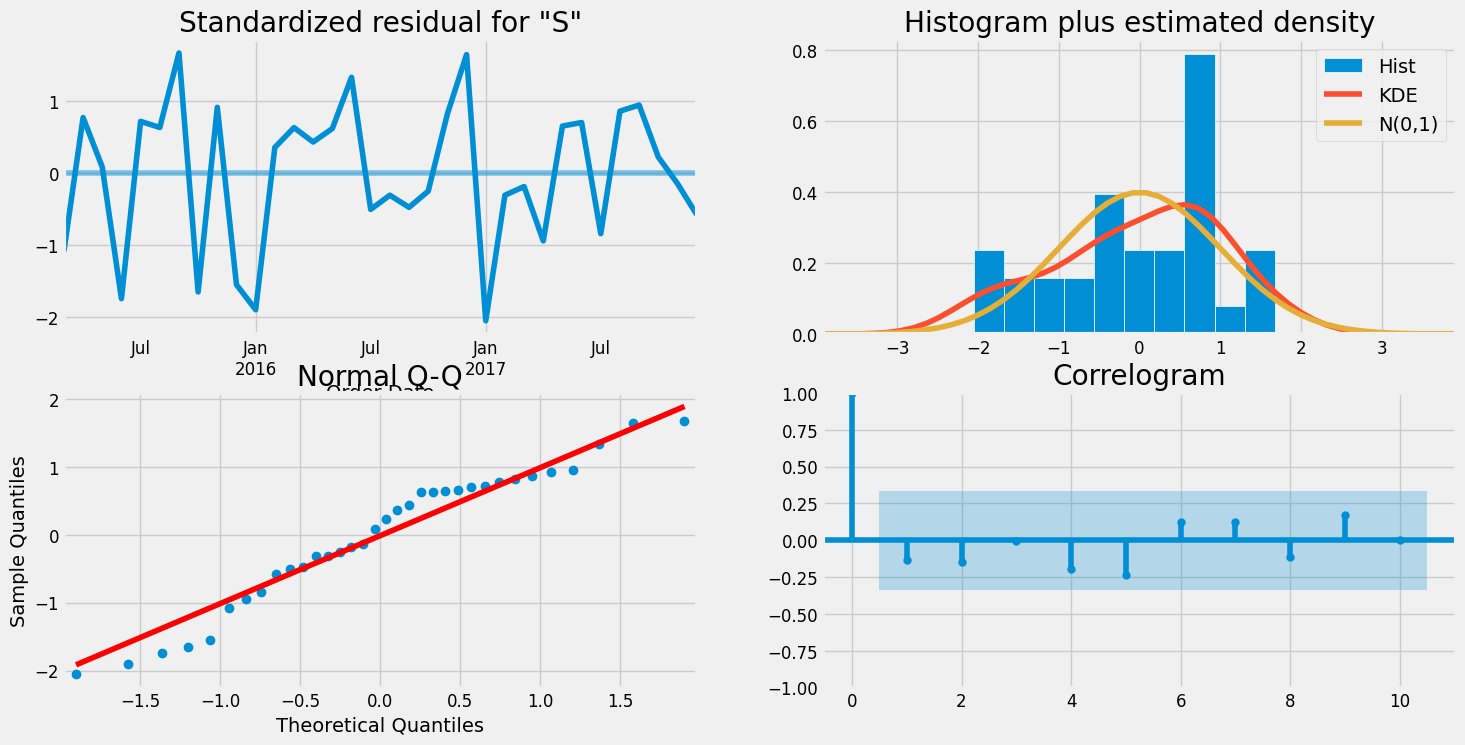

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),  # Reduce AR, MA lags
                                seasonal_order=(1, 0, 0, 12),  # Reduce seasonal lags if needed
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

results.plot_diagnostics(figsize=(16, 8))
plt.show()


It is not perfect, however, the model diagnostics suggests that the model residuals are near normally distributed.
_______________________________________________
##Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

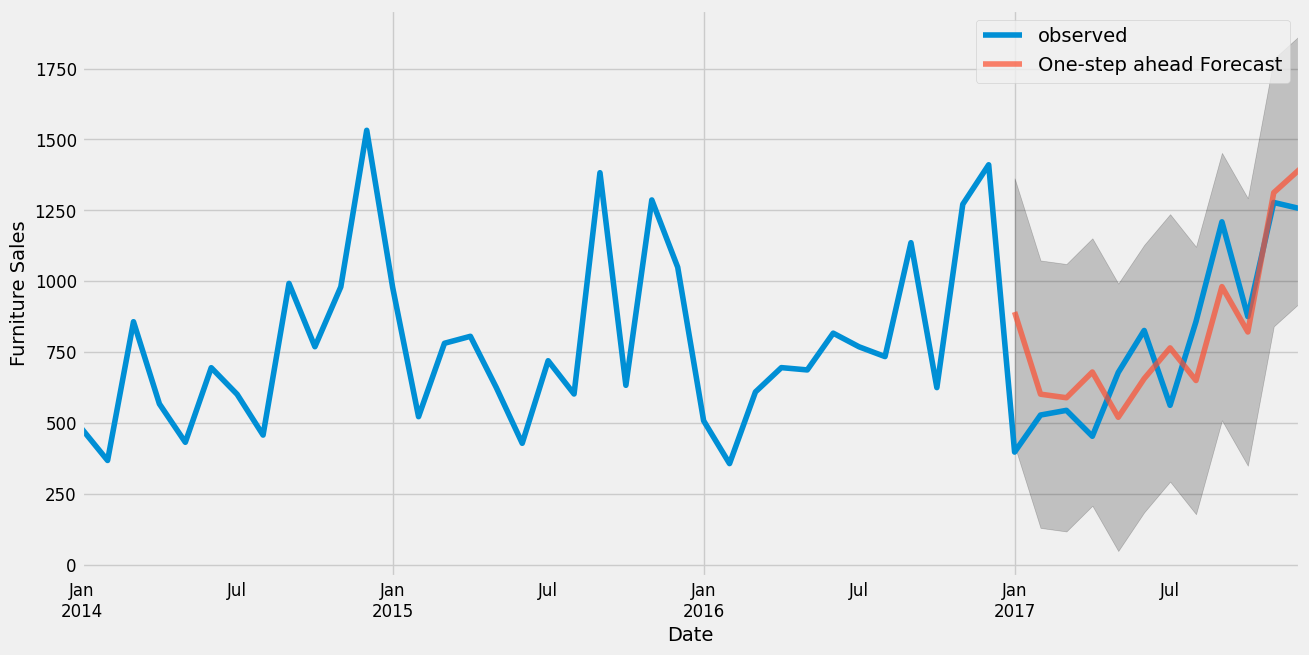

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 43018.51


In [26]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 207.41


##Producing and visualizing forecasts

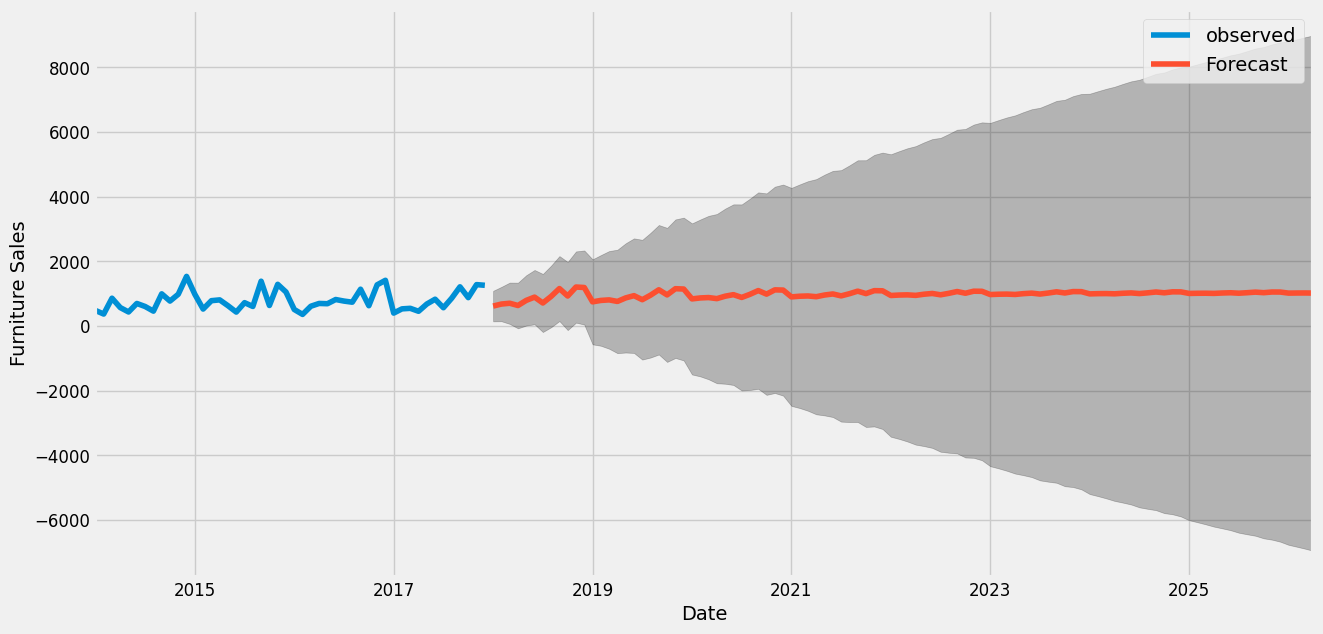

In [27]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

##Time Series of Furniture vs. Office Supplies
According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [28]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

##Data Exploration
We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [29]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


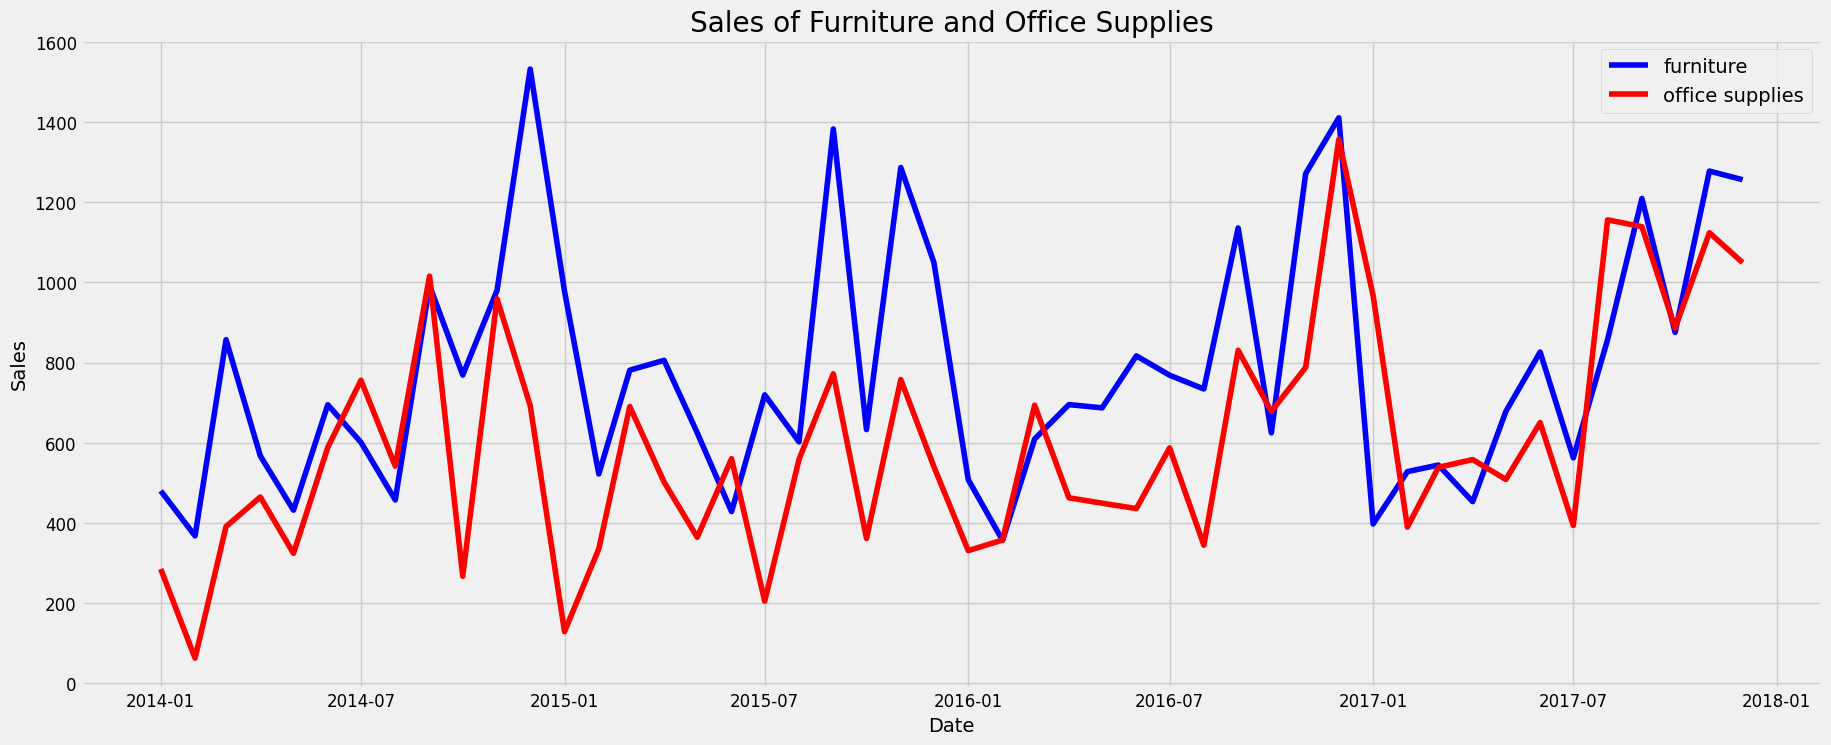

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

here, it can be observed that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [32]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))


Office supplies first time produced higher sales than furniture is 2014-07-01.


##Time Series Modeling with Prophet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, Using Prophet to get a model up and running.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxp8t5_x/9y9ls0ml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxp8t5_x/qpt6ogch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19821', 'data', 'file=/tmp/tmpzxp8t5_x/9y9ls0ml.json', 'init=/tmp/tmpzxp8t5_x/qpt6ogch.json', 'output', 'file=/tmp/tmpzxp8t5_x/prophet_model563jnh17/prophet_model-20241228101524.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

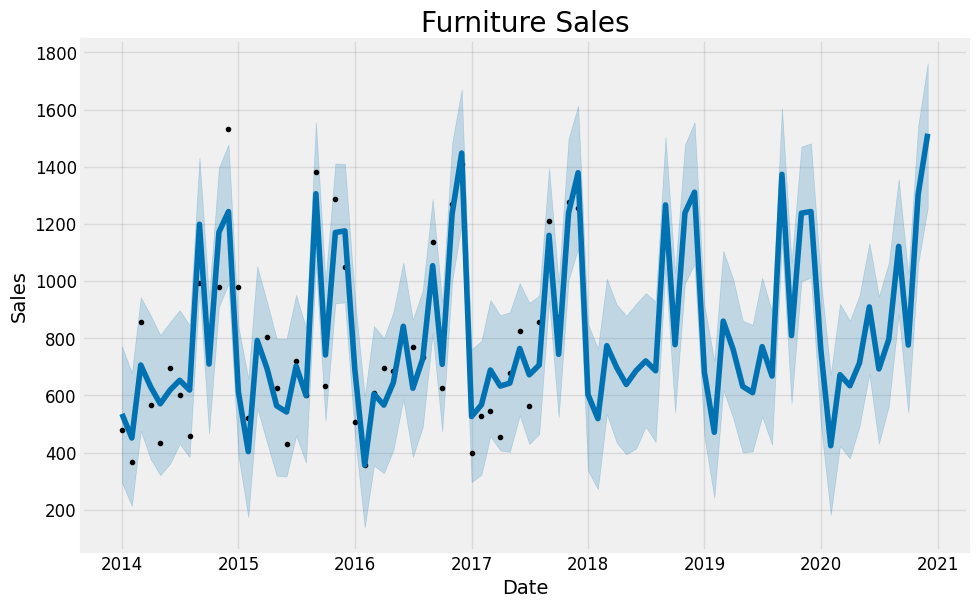

In [34]:
from prophet import Prophet

# Renaming columns for compatibility with Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

# Forecasting for Furniture
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

# Forecasting for Office
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

# Plotting
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')


<Figure size 1800x600 with 0 Axes>

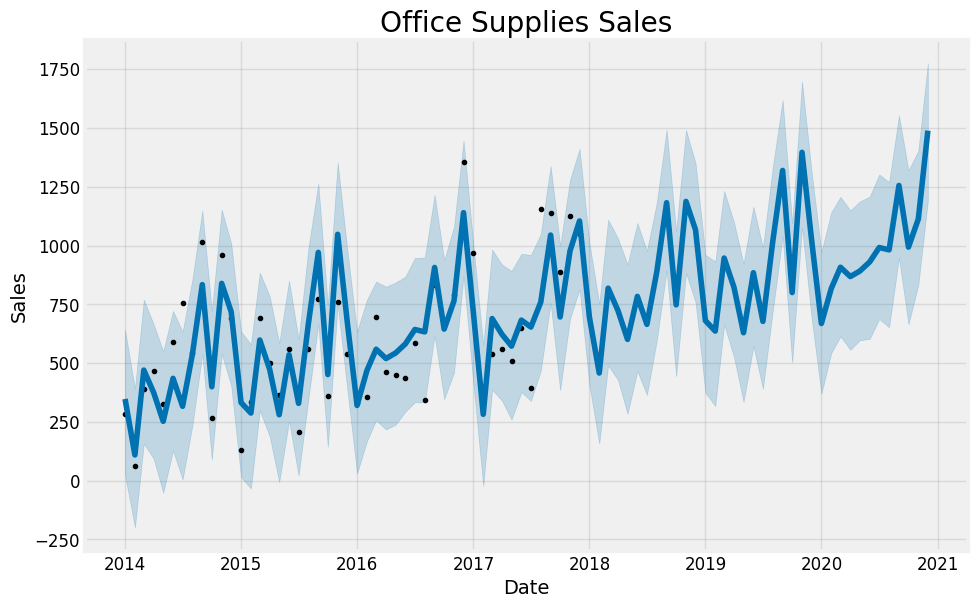

In [35]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

##Compare Forecasts
Having the forecasts for three years for these two categories into the future. Now join them together to compare their future forecasts.

In [36]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,294.547853,771.879012,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,213.172293,679.049630,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,476.312461,943.524742,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,376.678312,880.120223,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,321.318051,811.584493,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


##Trend and Forecast Visualization

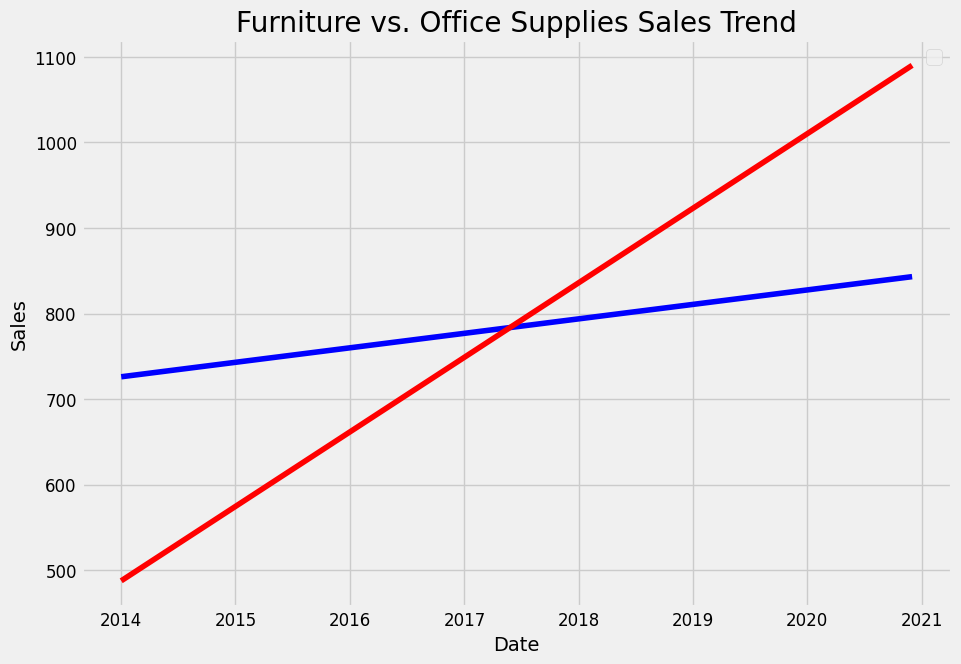

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

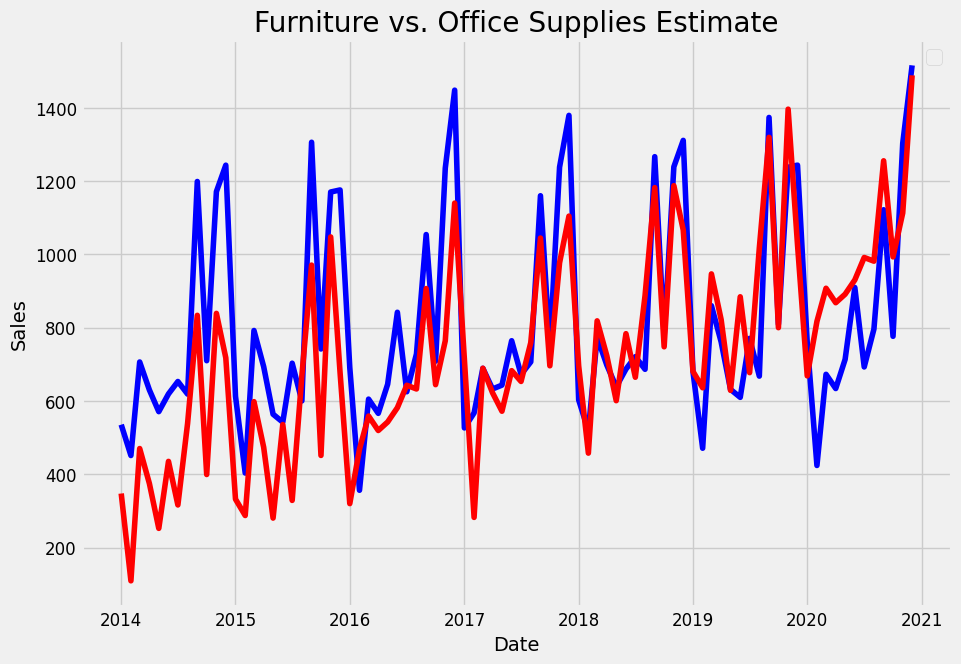

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

##Trends and Patterns
Now, Using the Prophet Models to inspect different trends of these two categories in the data.

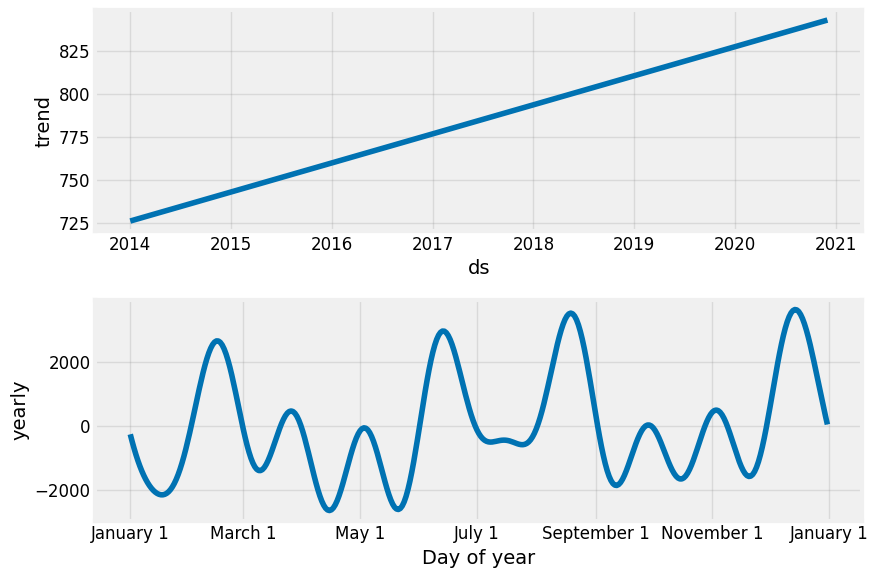

In [39]:
furniture_model.plot_components(furniture_forecast);

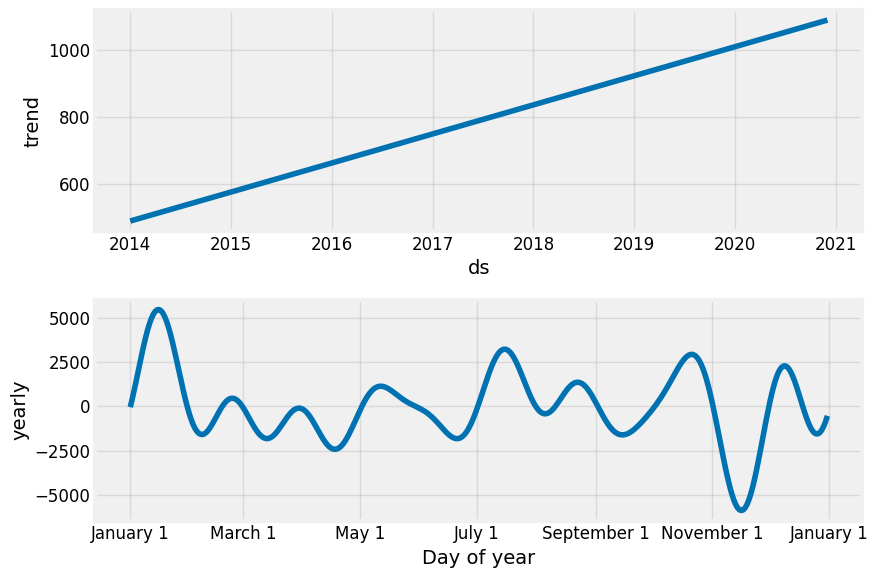

In [40]:
office_model.plot_components(office_forecast);

**Conclusion**:
Good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.

The worst month for furniture is April and June, the worst month for office supplies is November. The best month for furniture is September, and the best month for office supplies is January.